<a href="https://colab.research.google.com/github/Anders-tech1999/ML2/blob/main/E3_Chap4solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 3

In this exercise, you'll practice on the examples we went through during the lectures.

Try one or more!

1. You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy

2. Try using layers with more units or fewer units: 32 units, 64 units, and so on.

**Loading the IMDB dataset**

In [7]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #we’ll keep the top 10,000 most frequent words

17464789/17464789 [==============================] - 0s 0us/step


**Encoding the integer sequences via multi-hot encoding**

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): # function takes two parameters: sequences (a list of lists, where each inner list contains integers) and dimension (an optional parameter that defaults to 10,000 if not provided
    results = np.zeros((len(sequences), dimension)) #create a 10,000 dimensional vector with all 0s
    for i, sequence in enumerate(sequences): #Loop through the sequences - enumerate function is used to get both the index (i) and the contents (sequence) of each sequence in "sequences"
        for j in sequence: #Another loop is started inside the first loop to iterate over each integer (j) in the current sequence
            results[i, j] = 1. #Insert a 1 when there is a word
    return results #This array is a numerical representation of the input sequences suitable for use in machine learning models.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype("float32") #vectorize labels
y_test = np.asarray(test_labels).astype("float32")
# FINALLY, our data is ready for the NN

### Building your model

In [10]:
# The input data is vectors and the labels are scalars (1s and 0s)
# -	There are two key architecture decisions:
#     1.	How many layers to use
#     2.	How many units to choose for each layer

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #16 units means that the matrix W has shape (input dim, 16). dot product projects the input data onto a 16-dimensional representation space
    layers.Dense(16, activation="relu"), # Dense with Relu implements Tensor operation: "output = relu(dot(input, W) + b)" where b is bias
    layers.Dense(1, activation="sigmoid") # squeez values into [0.1], referencing probs = creating the desired Classification
])

In [11]:
model.compile(optimizer="rmsprop", #rmsprop because it’s an excellent default - RMSprop is an adaptive learning rate optimization algorithm designed to work well on online and non-stationary problems
              loss="binary_crossentropy", #binary_crossentropy because the outcome is binary - The binary crossentropy loss is a measure of how far off from the true values (0 or 1) the predictions are.
              metrics=["accuracy"]) #Monitor accuracy

In [12]:
#Create a validation set with 10,000 samples

x_val = x_train[:10000] #store the first 10,000 examples from x_train -  used as the validation set during the training process
partial_x_train = x_train[10000:] #will store the remaining examples in x_train after the first 10,000 -  used as the training set to train the model.
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#Training the model
history = model.fit(partial_x_train, #input data used to train the model
                    partial_y_train, #the corresponding target data (labels) for partial_x_train
                    epochs=20, #number of epochs, or iterations over the entire partial_x_train and partial_y_train data provided.
                    batch_size=512, #number of samples that will be propagated (føre videre) through the network at one time. Here, it means that the model will take 512 samples from the training data, perform a forward pass followed by a backward pass (to update weights), and repeat this process until it has gone through all the data.
                    validation_data=(x_val, y_val),
                    verbose=0) #verbose level of 0 means silent, 1 would show a progress bar, and 2 would show one line per epoch.

#This "history" object contains a dictionary containing data on what happened during training

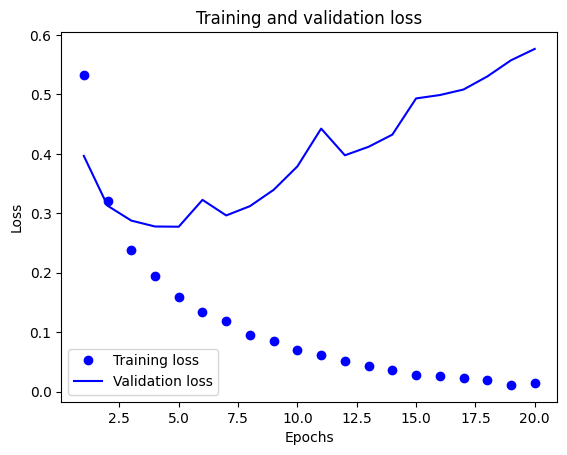

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history #dictionary that holds a record of the training and validation loss values and metrics values at each epoch.
loss_values = history_dict["loss"] # extracts the training loss values from history_dict using the key "loss" and assigns them to the variable loss_values
val_loss_values = history_dict["val_loss"] #gets the validation loss values recorded after each epoch from history_dict using the key "val_loss" and assigns them to val_loss_values
epochs = range(1, len(loss_values) + 1) #This range corresponds to the epoch numbers (1-indexed) and will be used as the X-axis for plotting
plt.plot(epochs, loss_values, "bo", label="Training loss") #creates a plot of the training loss over epochs. The 'bo' argument specifies that the points should be plotted as blue circles. The label argument gives the plotted data a name for use in the legend.
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #The 'b' argument specifies that the points should be plotted as a blue line.
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() #Displays a legend to identify each line plot with their respective labels ("Training loss" and "Validation loss").
plt.show() #Displays the plot

#we need more epochs than we use, as we need to be sure of the right amount of epochs as a function of the optimimal Loss value
#we can apply accuracy instead of loss to gain insghts into the choice of epochs

In [15]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")
#Hence, we choose 4 epochs in the Retrain of the full trainset

Epoch with minimum validation loss: 4


**Remove one layer representation.**

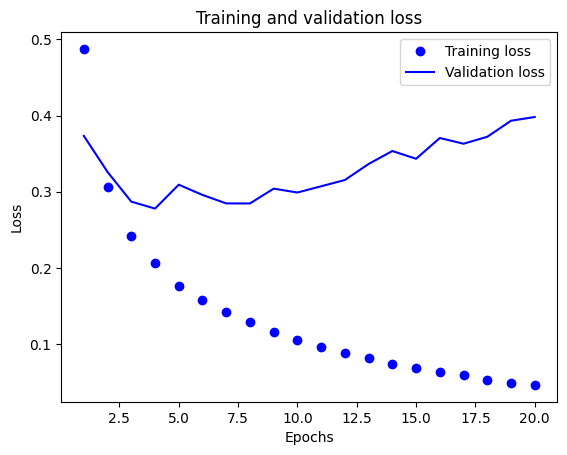

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

#In this model we only use 1 layer instead of using 2 which is done above
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")

Epoch with minimum validation loss: 4


**Add more units**

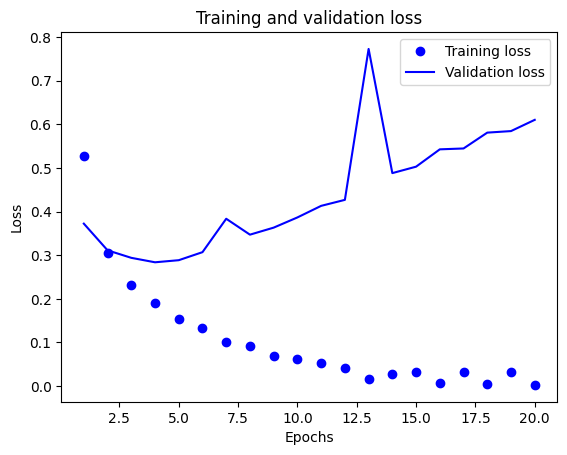

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")

Epoch with minimum validation loss: 4


In [20]:
#Retrain the model with full trainset
from tensorflow import keras
from tensorflow.keras import layers

#We use 16 units in each layer, as using more units did not change the minimum amount of epochs
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", #rmsprop because it’s an excellent default - RMSprop is an adaptive learning rate optimization algorithm designed to work well on online and non-stationary problems
              loss="binary_crossentropy", #binary_crossentropy because the outcome is binary - The binary crossentropy loss is a measure of how far off from the true values (0 or 1) the predictions are.
              metrics=["accuracy"]) #Monitor accuracy

#we stop at 4 epochs to avoid overfitting - this number is obtained during training of the model
model.fit(x_train, #input data used to train the model
          y_train, #the corresponding target data (labels) for x_train
          epochs=4, #number of epochs, or iterations over the entire x_train and y_train data provided.
          batch_size=512) #number of samples that will be propagated (føre videre) through the network at one time. Here, it means that the model will take 512 samples from the training data, perform a forward pass followed by a backward pass (to update weights), and repeat this process until it has gone through all the data.

results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 5s 52ms/step - loss: 0.4448 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 2s 51ms/step - loss: 0.2610 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 3s 53ms/step - loss: 0.2067 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.2904 - accuracy: 0.8852


We obtain an accuracy of 88.52%
Later we learn how to obtain approx 95%

## Newswire

### Information bottleneck

Try creating an information bottleneck in your architecture. For example, you can this by using 64 neurons in the first layer and 4 neurons in the second.

Try different types of configurations and see how the validation loss or accuracy curve is affected. Write a function that allows to change the number of neurons in each layer and then make a joint plot of all the curves afterwards.

I have copied in the data loading and labels encoding steps from the course notebook to help you get started.

**Loading the Reuters dataset**

In [15]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000) ##we’ll keep the top 10,000 most frequent words

len(train_data)
len(test_data) #Why is this not printing both values???

2246

**Decoding newswires back to text**

In [16]:
x_train = vectorize_sequences(train_data) #vectorize labels
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [19]:
#We have 46 output classes (number of Newswire categories) instead of the usual binary format having 2 classes
def to_one_hot(labels, dimension=46): #defines a function named to_one_hot, which takes two parameters: labels (a list of integer labels) and dimension (an optional parameter with a default value of 46). The dimension should be at least as large as the number of distinct labels
    results = np.zeros((len(labels), dimension)) #filled with zeros. Its shape is determined by the number of labels (len(labels)) and the dimension. If there are 100 labels, results will be an array with 100 rows and 46 columns.
    for i, label in enumerate(labels): # starts a loop over labels. Using enumerate, it retrieves both the index (i) and the value (label) for each label in "labels"
        results[i, label] = 1. #achieves one-hot encoding: each label is represented as a vector of zeros with a single 1 indicating the label.
    return results #contains the one-hot encoded representation of the labels input array.
y_train = to_one_hot(train_labels) #to_one_hot function is called with train_labels, and the resulting one-hot encoded array is assigned to y_train
y_test = to_one_hot(test_labels)

In [20]:
#We’ll use one-hot encoding for vectorizing the labels also
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Setting aside a validation set**

In [21]:
x_val = x_train[:1000] #store the first 10,000 examples from x_train -  used as the validation set during the training process
partial_x_train = x_train[1000:] # #will store the remaining examples in x_train after the first 10,000 -  used as the training set to train the model.
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Building your model

We only use 2 hidden layers as we want a generalizing model, if we made a significant higher amount of hidden layers the model would overfit the patterns of the training data from this performing bad on the test-data.

In [24]:
#How many neurons do we need then? At least 46, as this is the number of Newswire categories

#Training the model!
def news_nn(nl1, nl2): # function news_nn is defined with two parameters, nl1 and nl2, which are intended to be the number of neurons in the first and second layers of the neural network
    model = keras.Sequential([
        layers.Dense(nl1, activation="relu"), #nl1 should be 64 as thats the first power of 2 bigger than the 46 categories of Newswries
        layers.Dense(nl2, activation="relu"), #copy nl1 - look at "neuron_configs" as this loops through various combinations of units in layers
        layers.Dense(46, activation="softmax") #softmax" activation is used, which is standard for multi-class classification tasks as it outputs a probability distribution over the classes.
    ])

    model.compile(optimizer="rmsprop", #rmsprop because it’s an excellent default - RMSprop is an adaptive learning rate optimization algorithm designed to work well on online and non-stationary problems
              loss="binary_crossentropy", #binary_crossentropy because the outcome is binary - The binary crossentropy loss is a measure of how far off from the true values (0 or 1) the predictions are.
              metrics=["accuracy"]) #Monitor accuracy

    history = model.fit(partial_x_train, #input data used to train the model
                        partial_y_train, #the corresponding target data (labels) for partial_x_train
                        epochs=20, #number of epochs, or iterations over the entire partial_x_train and partial_y_train data provided.
                        batch_size=512, #number of samples that will be propagated (føre videre) through the network at one time. Here, it means that the model will take 512 samples from the training data, perform a forward pass followed by a backward pass (to update weights), and repeat this process until it has gone through all the data.
                        validation_data=(x_val, y_val),
                        verbose=0) #verbose level of 0 means silent, 1 would show a progress bar, and 2 would show one line per epoch.

    # Return validation accuracy for plotting outside the function
    return history.history['val_accuracy']


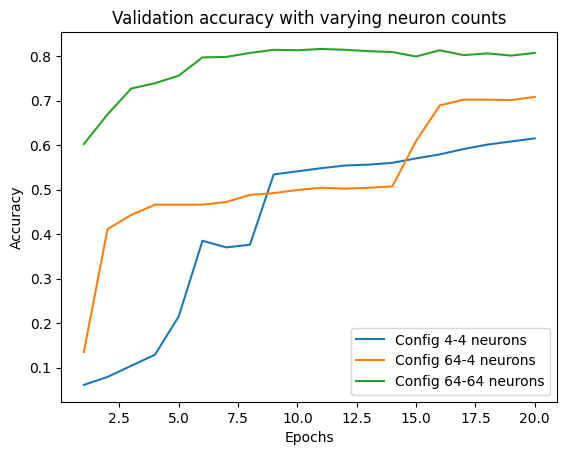

In [ ]:
# Configurations of neurons to try
neuron_configs = [(4, 4), (64, 4), (64, 64)] #list op tuples - 3 configurations will be tested: 4 neurons in both layers, 64 in the first and 4 in the second, and 64 neurons in both layers.
val_accuracies = [] #an empty list that will store the validation accuracies for each of these configurations.

# Run training for each neuron configuration and collect validation accuracies
for nl1, nl2 in neuron_configs: #For each iteration, nl1 and nl2 will be set to the neuron counts in the first and second layers, as specified in the current configuration tuple.
    val_acc = news_nn(nl1, nl2) #Within the loop, the news_nn function is called with the current neuron configuration (nl1, nl2). This function trains the model and returns the validation accuracy. This returned value is stored in val_acc
    val_accuracies.append(val_acc) #The validation accuracy (val_acc) for the current configuration is appended to the val_accuracies list.

# Plotting all the validation accuracies
epochs = range(1, 21) #created for plot purposes
for i, val_acc in enumerate(val_accuracies): # loop is initiated to plot the validation accuracies. For each set of validation accuracies in val_accuracies, a line is plotted on a graph. The label for each line is dynamically generated to indicate the neuron configuration it represents.
    plt.plot(epochs, # x-axis, representing each training epoch. It's a range object from 1 to 20 (inclusive) since the model was trained for 20 epochs
             val_acc, #  y-axis, representing the validation accuracy for the neural network with the current configuration of neurons at each epoch.
             label=f'Config {neuron_configs[i][0]}-{neuron_configs[i][1]} neurons') # label is constructed using an f-string - this creates a string that describes the configuration of the neural network that produced the corresponding validation accuracies.

plt.title('Validation accuracy with varying neuron counts')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let’s train it from scratch for nine epochs


In [25]:
#Retrain the model with full trainset
from tensorflow import keras
from tensorflow.keras import layers

#We use 64 units in each hidden layer, as the training of the model yelded the highest accuracy here.
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", #rmsprop because it’s an excellent default - RMSprop is an adaptive learning rate optimization algorithm designed to work well on online and non-stationary problems
              loss="binary_crossentropy", #binary_crossentropy because the outcome is binary - The binary crossentropy loss is a measure of how far off from the true values (0 or 1) the predictions are.
              metrics=["accuracy"]) #Monitor accuracy

#we stop at 9 epochs to avoid overfitting - this number is obtained during training of the model
model.fit(x_train, #input data used to train the model
          y_train, #the corresponding target data (labels) for x_train
          epochs=9, #number of epochs, or iterations over the entire x_train and y_train data provided.
          batch_size=512) #number of samples that will be propagated (føre videre) through the network at one time. Here, it means that the model will take 512 samples from the training data, perform a forward pass followed by a backward pass (to update weights), and repeat this process until it has gone through all the data.

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 4s 176ms/step - loss: 0.4717 - accuracy: 0.0170
Epoch 2/9
18/18 [==============================] - 1s 61ms/step - loss: 0.1478 - accuracy: 0.2801
Epoch 3/9
18/18 [==============================] - 3s 169ms/step - loss: 0.0916 - accuracy: 0.4185
Epoch 4/9
18/18 [==============================] - 3s 167ms/step - loss: 0.0755 - accuracy: 0.4885
Epoch 5/9
18/18 [==============================] - 3s 169ms/step - loss: 0.0658 - accuracy: 0.5334
Epoch 6/9
18/18 [==============================] - 4s 227ms/step - loss: 0.0593 - accuracy: 0.5671
Epoch 7/9
18/18 [==============================] - 3s 175ms/step - loss: 0.0550 - accuracy: 0.5974
Epoch 8/9
18/18 [==============================] - 3s 167ms/step - loss: 0.0519 - accuracy: 0.6219
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.6358


This only yields an accuracy 0f 63,58% which is inadequate and does not meet the Lecture accuracy as well... wtf?

In [28]:
predictions = model.predict(x_test)
predictions[0].shape
#the first entry in “prediction” is a vector of length 46 printing: (46,)
np.sum(predictions[0])
#Reason why the sum is not exactly 1 is due to rounding in the 46 probs from softmax

71/71 [==============================] - 1s 13ms/step


0.9999998

In 12.15DL > Lables + loss
Is it shown how to cast labels as integers instead of one-hot encoding them.